<a href="https://colab.research.google.com/github/annasli378/analizaAK/blob/main/wyznaczenie_statystyk_dla_cech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importy


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, f_oneway, tukey_hsd, levene
import matplotlib.pyplot as plt

Wczytanie i podział danych

In [ ]:
# Wczytanie danych z plików CSV
CECHY = pd.read_csv('/content/drive/MyDrive/USG/cechy_nowe/CECHY_TEKSTURA_SLEB_TEXT.csv')
column_names = list(CECHY.columns)
CECHY = CECHY.values
Y = pd.read_csv('/content/drive/MyDrive/USG/cechy_nowe/Y_alfabetycznie.csv', header = None).values

# Określenie wymiarów macierzy danych
w,k = CECHY.shape

# Inicjalizacja pustych list dla grup
ak1, ak2, ak3 = np.zeros((95,k)), np.zeros((48,k)), np.zeros((32,k))
c1, c2, c3 = 0, 0 ,0

# Podział danych na trzy grupy na podstawie Y
for wiersz in range(0,175):
    if Y[wiersz] == 1:
        ak1[c1, :] = CECHY[wiersz, :]
        c1+=1
    elif Y[wiersz] == 2:
        ak2[c2, :] = CECHY[wiersz, :]
        c2+=1
    elif Y[wiersz] == 3:
        ak3[c3, :] = CECHY[wiersz, :]
        c3+=1


In [ ]:
column_names

Funckje

In [ ]:
# Funkcja sprawdzająca normalność rozkładu danych za pomocą testu Shapiro-Wilka
def normality(Group1, Group2, Group3):
    print('Shapiro-Wilk Test p-values:')
    print(shapiro(Group1))
    print(shapiro(Group2))
    print(shapiro(Group3))
    return [shapiro(Group1).pvalue , shapiro(Group2).pvalue, shapiro(Group3).pvalue]

In [ ]:
# Funkcja sprawdzająca równość wariancji za pomocą testu Levene'a
def varin(Group1, Group2, Group3):
  return levene(Group1, Group2, Group3, center='median')

In [ ]:
# Funkcja przeprowadzająca analizę wariancji (ANOVA) i wyświetlająca wyniki
def get_anova(Group1, Group2, Group3):
  alpha_anova =0.05
  #data = [Group1, Group2, Group3]
  f_val, p_val = f_oneway(Group1, Group2, Group3)
  if p_val < alpha_anova:
        print(f'One-Way ANOVA: There is a significant difference between groups (p = {round(p_val, 4)}).')
  else:
        print(f'One-Way ANOVA: No significant difference between groups (p = {round(p_val, 4)}).')
  return p_val



In [ ]:
# Funkcja przeprowadzająca test Tukeya HSD i wyświetlająca wyniki
def get_tukey(Group1, Group2, Group3):
  tukey = tukey_hsd(Group1, Group2, Group3)
  print(tukey)

  return tukey.pvalue

analiza

In [ ]:
# Inicjalizacja tablic na wyniki
wyniki_nom = np.zeros((k,5))
roznice_grupy = np.zeros((k,3))

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9422624707221985, pvalue=0.00038940488593652844)
ShapiroResult(statistic=0.909513533115387, pvalue=0.0012941547902300954)
ShapiroResult(statistic=0.9179979562759399, pvalue=0.018353378400206566)
One-Way ANOVA: No significant difference between groups (p = 0.0864).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9385294914245605, pvalue=0.00023367094399873167)
ShapiroResult(statistic=0.925649881362915, pvalue=0.004730221349745989)
ShapiroResult(statistic=0.9280479550361633, pvalue=0.034563567489385605)
One-Way ANOVA: No significant difference between groups (p = 0.2274).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.96366286277771, pvalue=0.009749455377459526)
ShapiroResult(statistic=0.9491552710533142, pvalue=0.03701049089431763)
ShapiroResult(statistic=0.9407513737678528, pvalue=0.0786350667476654)
One-Way ANOVA: No significant difference between groups (p = 0.208).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=

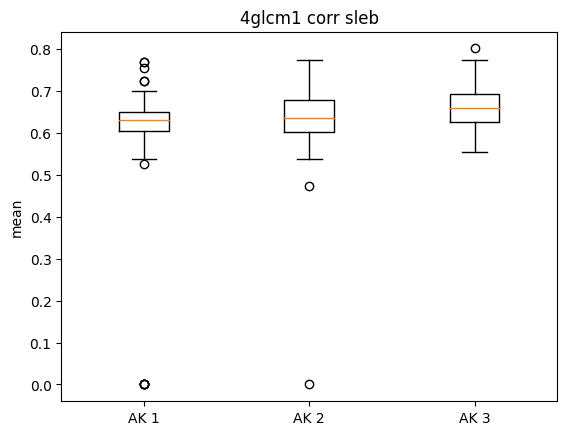

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.031     0.355    -0.084     0.022
 (0 - 2)     -0.062     0.045    -0.123    -0.001
 (1 - 0)      0.031     0.355    -0.022     0.084
 (1 - 2)     -0.031     0.522    -0.100     0.037
 (2 - 0)      0.062     0.045     0.001     0.123
 (2 - 1)      0.031     0.522    -0.037     0.100

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.6799068450927734, pvalue=4.37229652440127e-13)
ShapiroResult(statistic=0.7613912224769592, pvalue=1.9304395948438469e-07)
ShapiroResult(statistic=0.96241694688797, pvalue=0.3194112181663513)
One-Way ANOVA: No significant difference between groups (p = 0.1608).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.6737422943115234, pvalue=3.2125113658652837e-13)
ShapiroResult(statistic=0.7081456184387207, pvalue=1.8539008550533254e-08)
ShapiroResult(statistic=0.948498547077179, pvalue=0.13063403964042664)
One-Way ANOVA: No

In [ ]:
# Analiza dla każdej cechy
for i in range(0,k):
    ft_name = column_names[i]
    Group1, Group2, Group3 = ak1[:,i], ak2[:,i], ak3[:,i]
    wyniki_nom[i,0:3] = normality(Group1, Group2, Group3)

    wyniki_nom[i,3] = varin(Group1, Group2, Group3).pvalue

    p_anova = get_anova(Group1, Group2, Group3)
    wyniki_nom[i,4] = p_anova

    # Jeśli istnieje istotna różnica, generuj wykres pudełkowy i przeprowadź test Tukeya HSD
    if p_anova < 0.05:
        fig, ax = plt.subplots(1, 1)
        ax.boxplot([Group1, Group2, Group3])
        ax.set_xticklabels(["AK 1", "AK 2", "AK 3"])
        ax.set_ylabel("mean")
        ax.set_title(ft_name)
        plt.show()
        p_tukey = get_tukey(Group1, Group2, Group3)
        roznice_grupy[i,0] = p_tukey[0,1] # grupa 1 vs 2
        roznice_grupy[i,1] = p_tukey[0,2] # grupa 1 vs 3
        roznice_grupy[i,2] = p_tukey[1,2] # grupa 2 vs 3

# Zapis wyników do plików CSV
df = pd.DataFrame(wyniki_nom)
df.to_csv('res.csv', index=False)
df = pd.DataFrame(roznice_grupy)
df.to_csv('roznice_grupy.csv', index=False)

# stare


In [ ]:
Group1

array([0.13669, 0.12651, 0.13707, 0.14743, 0.18097, 0.18816, 0.18537,
       0.18346, 0.19859, 0.1737 , 0.16862, 0.14928, 0.15958, 0.15301,
       0.15672, 0.1792 , 0.17573, 0.12729, 0.15471, 0.13332, 0.15784,
       0.16478, 0.17159, 0.14812, 0.22826, 0.17382, 0.18354, 0.16276,
       0.21613, 0.15287, 0.18633, 0.17539, 0.16967, 0.19938, 0.17812,
       0.17123, 0.15651, 0.18983, 0.1513 , 0.1907 , 0.17118, 0.15391,
       0.13869, 0.15795, 0.17101, 0.18056, 0.1738 , 0.14987, 0.17372,
       0.158  , 0.20602, 0.17195, 0.17201, 0.18907, 0.18556, 0.2171 ,
       0.19078, 0.22615, 0.2242 , 0.19917, 0.18847, 0.20028, 0.12888,
       0.22342, 0.17394, 0.18292, 0.15906, 0.16196, 0.17338, 0.16084,
       0.20685, 0.15574, 0.21073, 0.2038 , 0.16208, 0.20354, 0.13658,
       0.15107, 0.16301, 0.13222, 0.1907 , 0.22743, 0.16178, 0.15688,
       0.16224, 0.2006 , 0.20205, 0.22938, 0.18433, 0.1782 , 0.18521,
       0.20715, 0.16389, 0.16212, 0.18918])

In [ ]:
shapiro(Group1)

ShapiroResult(statistic=0.9795936346054077, pvalue=0.1446930170059204)

In [ ]:
pvals = np.zeros(CECHY.shape[1] - 1)

for i in range(1, CECHY.shape[1]):
    print("\n")
    print(EPISLEB_cechy.columns[i - 1])
    Group1 = ak1[:, i]
    Group2 = ak2[:, i]
    Group3 = ak3[:, i]

    pvals[i - 1] = stats_anova(Group1, Group2, Group3)

kol_num = 1

FT = np.zeros((CECHY.shape[0], sum(pvals < 0.05)))
wyniki_ex = {"VariableNames": [], "pvals": []}

for i in range(CECHY.shape[1] - 1):
    if pvals[i] < 0.05:
        print(EPISLEB_cechy.columns[i])
        print(pvals[i])
        FT[:, kol_num - 1] = CECHY[:, i]
        wyniki_ex["VariableNames"].append(EPISLEB_cechy.columns[i])
        wyniki_ex["pvals"].append(pvals[i])
        kol_num += 1

In [ ]:
Group3.shape

(1, 109)